In [1]:
import csv

In [2]:
file = open('Salary.csv')

type(file)

_io.TextIOWrapper

In [3]:
csvreader = csv.reader(file)

In [4]:
header = []
header = next(csvreader)
header

['', 'PHD', 'MBA', 'experience', 'salary']

In [5]:
rows = []
for row in csvreader:
        rows.append(row)
rows

[['0', '0', '0', '1', '95680.89008'],
 ['1', '0', '0', '2', '85360.44112'],
 ['2', '0', '0', '3', '109604.7703'],
 ['3', '0', '1', '4', '124632.2667'],
 ['4', '0', '1', '5', '115637.9933'],
 ['5', '0', '0', '6', '107554.6795'],
 ['6', '0', '0', '7', '173140.4631'],
 ['7', '0', '0', '8', '145713.6909'],
 ['8', '0', '1', '9', '179704.0879'],
 ['9', '0', '1', '10', '169442.2813'],
 ['10', '0', '0', '11', '132054.7539'],
 ['11', '0', '1', '12', '132791.7079'],
 ['12', '0', '1', '13', '209351.8798'],
 ['13', '0', '1', '14', '178863.1777'],
 ['14', '0', '0', '15', '122491.4413'],
 ['15', '0', '0', '16', '156568.079'],
 ['16', '0', '1', '17', '151133.7818'],
 ['17', '0', '1', '18', '238712.2289'],
 ['18', '0', '1', '19', '169882.3424'],
 ['19', '0', '1', '20', '145812.6666'],
 ['20', '0', '1', '21', '210378.922'],
 ['21', '0', '1', '22', '203959.7595'],
 ['22', '0', '1', '23', '246403.0577'],
 ['23', '0', '1', '24', '220123.1236'],
 ['24', '0', '1', '25', '227794.4223'],
 ['25', '0', '1', '26

In [6]:
file.close()

# using Pandas

In [15]:
import pandas as pd
df= pd.read_csv("Salary.csv")
df



,Unnamed: 0,PHD,MBA,experience,salary
0,0,0,0,1,95680.89008
1,1,0,0,2,85360.44112
2,2,0,0,3,109604.77030
3,3,0,1,4,124632.26670
4,4,0,1,5,115637.99330
...,...,...,...,...,...
195,195,1,1,16,213011.77780
196,196,0,1,17,215620.38280
197,197,0,0,18,188153.44100
198,198,0,1,19,239061.35440


In [16]:
df.columns

Index(['Unnamed: 0', 'PHD', 'MBA', 'experience', 'salary'], dtype='object')

In [17]:
df.salary

0       95680.89008
1       85360.44112
2      109604.77030
3      124632.26670
4      115637.99330
           ...     
195    213011.77780
196    215620.38280
197    188153.44100
198    239061.35440
199    191639.75880
Name: salary, Length: 200, dtype: float64

In [23]:
# block 1 - simple stats
mean1 = df['salary'].mean()
sum1 = df['salary'].sum()
max1 = df['salary'].max()
min1 = df['salary'].min()
count1 = df['salary'].count()
median1 = df['salary'].median() 
std1 = df['salary'].std() 
var1 = df['salary'].var() 

# print block 1
print ('Mean salary: ' + str(mean1))
print ('Sum of salaries: ' + str(sum1))
print ('Max salary: ' + str(max1))
print ('Min salary: ' + str(min1))
print ('Count of salaries: ' + str(count1))
print ('Median salary: ' + str(median1))
print ('Std of salaries: ' + str(std1))
print ('Var of salaries: ' + str(var1))

Mean salary: 183518.1580934501
Sum of salaries: 36703631.61869
Max salary: 342048.8182
Min salary: 62942.00704
Count of salaries: 200
Median salary: 184025.33715
Std of salaries: 51987.35230965559
Var of salaries: 2702684800.168252


In [25]:
# block 2 - group by
#groupby_sum1 = df.groupby(['MBA']).sum() 
groupby_countMBA= df.groupby(['MBA']).count()
#groupby_countPHD = df.groupby(['PHD']).count()

print(groupby_countMBA)
#print(groupby_countPHD)

# print block 2
#print ('Sum of values, grouped by the Country: ' + str(groupby_countMBA))
#print ('Count of values, grouped by the Country: ' + str(groupby_count1))

     Unnamed: 0  PHD  experience  salary
MBA                                     
0            65   65          65      65
1           135  135         135     135


# predict Salary

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
import sklearn.metrics as sm
import matplotlib.pyplot as plt

data = pd.read_csv("salary.csv")
X = data['experience']
y = data['salary']

In [35]:
# check the total null values  in each column since the above shows there are missing value
# based on this those 3 features should be dropped before removing the null values
data.isnull().sum()

Unnamed: 0    0
PHD           0
MBA           0
experience    0
salary        0
dtype: int64

In [28]:
#splitting data into training and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [29]:
# data transform

X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

In [30]:
# training model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

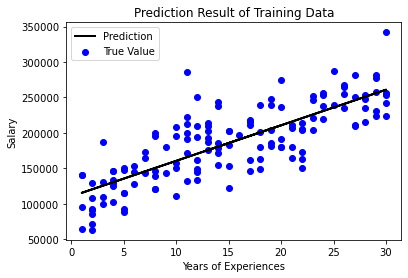

In [31]:
# Predicting Salary using Linear Model

y_train_pred = model.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label="True Value")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()



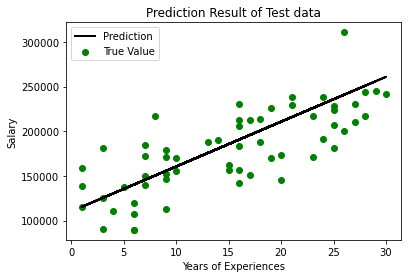

In [32]:
y_test_pred = model.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, color='green', label='True Value')
plt.plot(X_test, y_test_pred, color='black', linewidth=2, label='Prediction')
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Test data')
plt.legend()
plt.show()

In [33]:
# Model Evaluation

print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean squared error = 999240547.7
Explain variance score = 0.54
R2 score = 0.52


# Salary Prediction-Approach 2

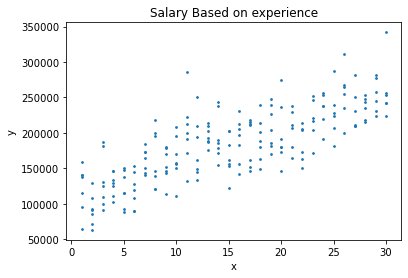

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
import sklearn.metrics as sm
import matplotlib.pyplot as plt

data = pd.read_csv("salary.csv")
x = data['experience']
y = data['salary']

# Displaying Data
fig = plt.figure()
plt.scatter(x, y, s=3)
plt.title("Salary Based on experience")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [50]:
# shape
print(data.shape)

(200, 5)


In [52]:
# head
print(data.head(20))

    Unnamed: 0  PHD  MBA  experience        salary
0            0    0    0           1   95680.89008
1            1    0    0           2   85360.44112
2            2    0    0           3  109604.77030
3            3    0    1           4  124632.26670
4            4    0    1           5  115637.99330
5            5    0    0           6  107554.67950
6            6    0    0           7  173140.46310
7            7    0    0           8  145713.69090
8            8    0    1           9  179704.08790
9            9    0    1          10  169442.28130
10          10    0    0          11  132054.75390
11          11    0    1          12  132791.70790
12          12    0    1          13  209351.87980
13          13    0    1          14  178863.17770
14          14    0    0          15  122491.44130
15          15    0    0          16  156568.07900
16          16    0    1          17  151133.78180
17          17    0    1          18  238712.22890
18          18    0    1       

In [53]:
# descriptions
print(data.describe())

       Unnamed: 0         PHD        MBA  experience         salary
count  200.000000  200.000000  200.00000  200.000000     200.000000
mean    99.500000    0.085000    0.67500   15.000000  183518.158093
std     57.879185    0.279582    0.46955    8.565444   51987.352310
min      0.000000    0.000000    0.00000    1.000000   62942.007040
25%     49.750000    0.000000    0.00000    8.000000  145787.922675
50%     99.500000    0.000000    1.00000   15.000000  184025.337150
75%    149.250000    0.000000    1.00000   22.000000  219068.606725
max    199.000000    1.000000    1.00000   30.000000  342048.818200


In [55]:
# class distribution
print(data.groupby('MBA').size())  

MBA
0     65
1    135
dtype: int64


Unnamed: 0       AxesSubplot(0.125,0.657941;0.227941x0.222059)
PHD           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
MBA           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
experience       AxesSubplot(0.125,0.391471;0.227941x0.222059)
salary        AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

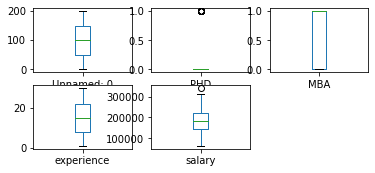

In [63]:
# box and whisker plots
data.plot(kind='box',subplots=True, layout=(3,3), sharex=False, sharey=False)
#pyplot.show()

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'PHD'}>],
       [<AxesSubplot:title={'center':'MBA'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

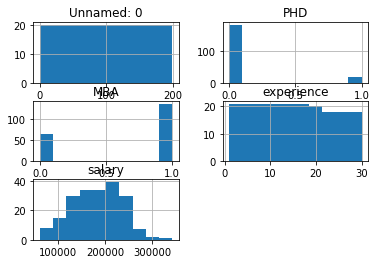

In [64]:
# histograms
data.hist()
#pyplot.show()

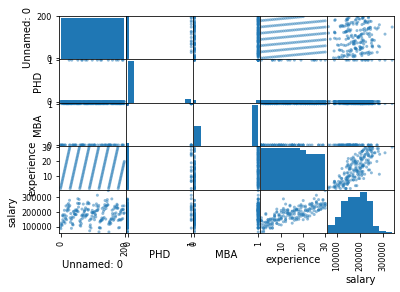

In [66]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# scatter plot matrix
scatter_matrix(data)
pyplot.show()

In [119]:
data.head

<bound method NDFrame.head of      Unnamed: 0  PHD  MBA  experience        salary
0             0    0    0           1   95680.89008
1             1    0    0           2   85360.44112
2             2    0    0           3  109604.77030
3             3    0    1           4  124632.26670
4             4    0    1           5  115637.99330
..          ...  ...  ...         ...           ...
195         195    1    1          16  213011.77780
196         196    0    1          17  215620.38280
197         197    0    0          18  188153.44100
198         198    0    1          19  239061.35440
199         199    0    1          20  191639.75880

[200 rows x 5 columns]>

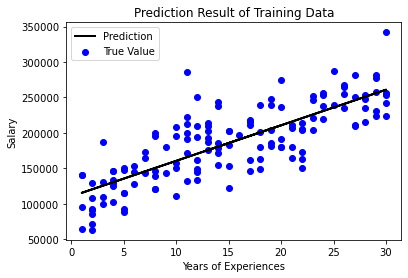

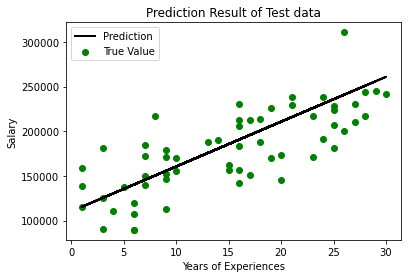

Mean squared error = 999240547.7
Explain variance score = 0.54
R2 score = 0.52


In [132]:
array = data.values
X = array[:,3]
y = array[:,4]

#splitting data into training and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label="True Value")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()

y_test_pred = model.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, color='green', label='True Value')
plt.plot(X_test, y_test_pred, color='black', linewidth=2, label='Prediction')
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Test data')
plt.legend()
plt.show()

print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

In [148]:
data2=data.loc[data['MBA'] == 1]
data2.describe()

,Unnamed: 0,PHD,MBA,experience,salary
count,135.000000,135.000000,135.0,135.000000,135.000000
mean,100.740741,0.088889,1.0,16.407407,193178.584309
std,57.665914,0.285643,0.0,8.597376,51325.100633
min,3.000000,0.000000,1.0,1.000000,63532.813080
25%,51.500000,0.000000,1.0,9.000000,152427.449150
50%,101.000000,0.000000,1.0,17.000000,202392.491100
75%,148.000000,0.000000,1.0,24.000000,228489.004650
max,199.000000,1.000000,1.0,30.000000,342048.818200


In [149]:
data4=data.loc[data['PHD'] == 1]
data4.describe()

,Unnamed: 0,PHD,MBA,experience,salary
count,17.000000,17.0,17.000000,17.000000,17.000000
mean,113.588235,1.0,0.705882,15.764706,212128.915989
std,55.291341,0.0,0.469668,9.107205,64587.073120
min,27.000000,1.0,0.000000,1.000000,89473.948310
25%,68.000000,1.0,0.000000,9.000000,172771.669100
50%,115.000000,1.0,1.000000,14.000000,213011.777800
75%,162.000000,1.0,1.000000,25.000000,238161.528800
max,195.000000,1.0,1.000000,30.000000,342048.818200


In [147]:
# Both MBA and PHD
data2=data.loc[data['MBA'] == 1]
data3=data2.loc[data2['PHD'] == 1]
data3.describe()

,Unnamed: 0,PHD,MBA,experience,salary
count,12.000000,12.0,12.0,12.000000,12.000000
mean,114.750000,1.0,1.0,18.250000,221819.412526
std,58.642406,0.0,0.0,9.761939,72545.168740
min,27.000000,1.0,1.0,1.000000,89473.948310
25%,72.000000,1.0,1.0,11.250000,178875.004175
50%,120.000000,1.0,1.0,21.500000,224831.067450
75%,165.000000,1.0,1.0,25.250000,261568.177725
max,195.000000,1.0,1.0,30.000000,342048.818200
